# K-Means Clustering and Its Application for Color Quantization

Contents
1. Introduction to K-Means Clustering
2. Using K-Means Clustering for Color Quantization

Source: https://machinelearningmastery.com/k-means-clustering-in-opencv-and-application-for-color-quantization/

## Introduction to K-Means Clustering

Cluster analysis is an unsupervised learning technique. 

A cluster is a distinct group of data points. The data points of each cluster are similar but different from those of the other clusters. 

K-means clustering is one of the most widely known techniques for cluster analysis. It takes unlabelled data points and assigns them to k number of clusters, for example k = 5. Each data point belongs to the cluster with the nearest cluster center. The center of each cluster is taken as the mean of the data points that belong to it. The algorithm requires that the user provide the value of k as an input.

Let's create a sample data set to see how k-means clustering works. Our sample data set has 5 clusters and we test if the clustering algorithm can identify them.

In [1]:
# Import dependencies
from cv2 import kmeans, TERM_CRITERIA_MAX_ITER, TERM_CRITERIA_EPS, KMEANS_RANDOM_CENTERS
from numpy import float32
from matplotlib.pyplot import scatter, show
from sklearn.datasets import make_blobs

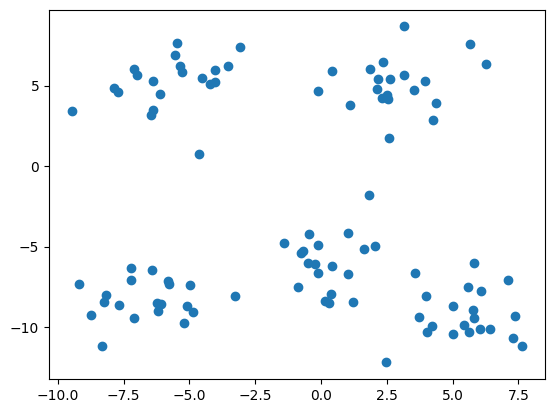

In [2]:
# Generate a sample dataset of 2D data points with 5 clusters
x, y_true = make_blobs(n_samples=100, centers=5, cluster_std=1.5, random_state=10)

# Plot the dataset
scatter(x[:, 0], x[:, 1])
show()

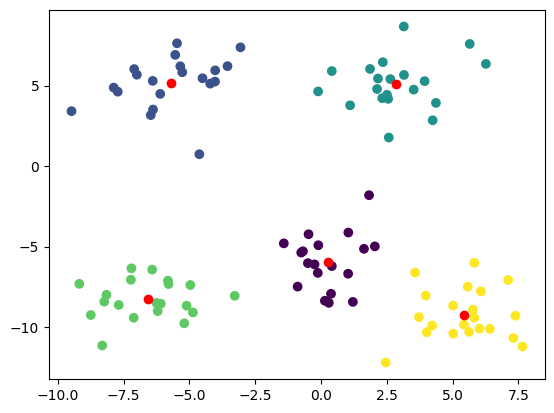

In [3]:
# Specify the algorithm's termination criteria
criteria = (TERM_CRITERIA_MAX_ITER + TERM_CRITERIA_EPS, 10, 1.0)

# Run the k-means clustering algorithm on the input data
compactness, y_pred, centers = kmeans(data=x.astype(float32), K=5, bestLabels=None, criteria=criteria, attempts=10, flags=KMEANS_RANDOM_CENTERS)

# Plot the data clusters, each having a different color, together with the corresponding cluster centers
scatter(x[:, 0], x[:, 1], c=y_pred)
scatter(centers[:, 0], centers[:, 1], c='red')
show()

Great! We can see that the k-means clustering algorithm identified the existing clusters correctly.

## Note: The impact of k

The algorithm requires the value of k as an input. In this case, we use the value 5 based on our knowledge of the data set (where we defined 5 centers). 

What happens if you change the value of k, e.g. to 2 or 10?

Next: let's use this algorithm to control the number of colors in the bricks picture.

## Using K-Means Clustering for Color Quantization

One of the applications of k-means clustering is the color quantization of images. Color quantization means reducing the number of distinct colors in an image. 

For example, it is critical for displaying images with many colors on devices that can only display a limited number of colors. This can be due to memory limitations. It also enables efficient compression of images.

In our case, the data points that we provide to the algorithm are the RGB values of each image pixel. RGB is a model that represents a color as values of red, green, blue. 

We will provide these values in the form of an nx3 array, where n is the number of pixels in the image. 

In [4]:
# Import dependencies
from cv2 import imread, cvtColor, COLOR_BGR2RGB
from numpy import uint8, unique
from matplotlib.pyplot import imshow

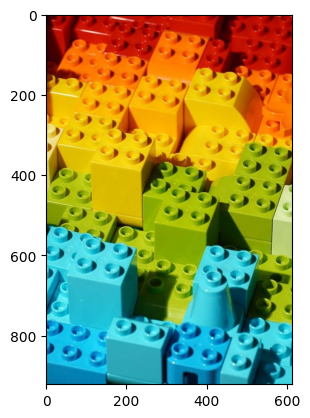

In [5]:
# Read image
img = imread('bricks.jpg')

# Change color model to RGB
img_RGB = cvtColor(img, COLOR_BGR2RGB)

# Show the image
imshow(img_RGB.astype(uint8))

As you can see, the image consists of many differently coloured pixels. There is red, orange, yellow, green, and blue but also many shades in between. 

Let's find out how many unique RGB values are in the image.

In [6]:
# Reshape image to an Mx3 array
img_data = img_RGB.reshape(-1, 3)

# Print the number of unique RGB values
print(len(unique(img_data, axis=0)), 'unique RGB values out of', img_data.shape[0], 'pixels')

154034 unique RGB values out of 566108 pixels


Wow, more than 150000 unique RGB values! With this in mind, let's apply the clustering algorithm. We want the unique RGB values to be clustered into k groups. 

With this, we can display the original image with only k colors. Here's how to do that:

5 unique RGB values out of 566108 pixels


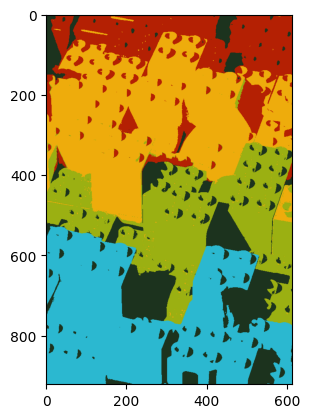

In [7]:
# Specify the algorithm's termination criteria
criteria = (TERM_CRITERIA_MAX_ITER + TERM_CRITERIA_EPS, 10, 1.0)

# Run the k-means clustering algorithm on the pixel values
compactness, labels, centers = kmeans(data=img_data.astype(float32), K=5, bestLabels=None, criteria=criteria, attempts=10, flags=KMEANS_RANDOM_CENTERS)

# Apply the RGB values of the cluster centers to all pixel labels
colours = centers[labels].reshape(-1, 3)

# Find the number of unique RGB values
print(len(unique(colours, axis=0)), 'unique RGB values out of', img_data.shape[0], 'pixels')

# Reshape array to the original image shape
img_colours = colours.reshape(img_RGB.shape)

# Display the quantized image
imshow(img_colours.astype(uint8))
show()

In this case, we use a value of 5 for k. If we look at the color quantized image, we find that the pixels belonging to the yellow and orange bricks have been grouped into the same cluster, possibly due to the similarity of their RGB values. In contrast, another cluster aggregates pixels belonging to regions of shadow.

Now try changing the value specifying the number of clusters for the k-means clustering algorithm and investigate its effect on the resulting image. 